In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib as jb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)
from sklearn.model_selection import cross_validate

# EDA

In [2]:
df = pd.read_csv("glcm_features_training_dataset_50_8.csv")
df 

,filename,homogeneity_d1_a0,homogeneity_d1_a45,homogeneity_d1_a90,homogeneity_d1_a135,homogeneity_d2_a0,homogeneity_d2_a45,homogeneity_d2_a90,homogeneity_d2_a135,energy_d1_a0,...,correlation_d2_a135,entropy_d1_a0,entropy_d1_a45,entropy_d1_a90,entropy_d1_a135,entropy_d2_a0,entropy_d2_a45,entropy_d2_a90,entropy_d2_a135,name
0,Albert (1).jpg,0.986774,0.986422,0.989389,0.980408,0.973803,0.986422,0.979322,0.980408,0.645156,...,0.952379,1.102063,1.101845,1.081848,1.147004,1.190748,1.101845,1.155458,1.147004,Albert
1,Albert (10).jpg,0.895432,0.868323,0.899535,0.873040,0.842290,0.868323,0.846129,0.873040,0.311988,...,0.944087,2.660008,2.778491,2.623784,2.754174,2.900469,2.778491,2.851091,2.754174,Albert
2,Albert (11).jpg,0.897341,0.869970,0.905817,0.874444,0.840590,0.869970,0.850355,0.874444,0.329728,...,0.942469,2.577521,2.696892,2.523889,2.668460,2.825723,2.696892,2.761398,2.668460,Albert
3,Albert (12).jpg,0.900557,0.874445,0.915391,0.877740,0.844808,0.874445,0.864703,0.877740,0.345541,...,0.936262,2.481117,2.591567,2.402730,2.573934,2.726320,2.591567,2.624195,2.573934,Albert
4,Albert (13).jpg,0.907365,0.884883,0.915259,0.891396,0.866505,0.884883,0.870828,0.891396,0.468442,...,0.893910,2.095770,2.183568,2.051168,2.156893,2.267989,2.183568,2.233947,2.156893,Albert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Vincent (50).jpg,0.899228,0.874544,0.905509,0.874004,0.844336,0.874544,0.859696,0.874004,0.348737,...,0.947361,2.482966,2.585453,2.466408,2.594271,2.690165,2.585453,2.662534,2.594271,Vincent
246,Vincent (6).jpg,0.935160,0.929151,0.943895,0.926899,0.905564,0.929151,0.923773,0.926899,0.466069,...,0.922892,1.909210,1.936578,1.866563,1.951228,2.045163,1.936578,1.967958,1.951228,Vincent
247,Vincent (7).jpg,0.954312,0.938632,0.949157,0.938043,0.928888,0.938632,0.920536,0.938043,0.451142,...,0.962143,1.955853,2.037519,1.987560,2.045386,2.088321,2.037519,2.135611,2.045386,Vincent
248,Vincent (8).jpg,0.934200,0.901210,0.921102,0.907438,0.890780,0.901210,0.873313,0.907438,0.360364,...,0.958873,2.351309,2.511861,2.421054,2.486805,2.554666,2.511861,2.634463,2.486805,Vincent


###Pengecekan Info Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   filename             250 non-null    object 
 1   homogeneity_d1_a0    250 non-null    float64
 2   homogeneity_d1_a45   250 non-null    float64
 3   homogeneity_d1_a90   250 non-null    float64
 4   homogeneity_d1_a135  250 non-null    float64
 5   homogeneity_d2_a0    250 non-null    float64
 6   homogeneity_d2_a45   250 non-null    float64
 7   homogeneity_d2_a90   250 non-null    float64
 8   homogeneity_d2_a135  250 non-null    float64
 9   energy_d1_a0         250 non-null    float64
 10  energy_d1_a45        250 non-null    float64
 11  energy_d1_a90        250 non-null    float64
 12  energy_d1_a135       250 non-null    float64
 13  energy_d2_a0         250 non-null    float64
 14  energy_d2_a45        250 non-null    float64
 15  energy_d2_a90        250 non-null    flo

###Pengecekan Null Value

In [4]:
df.isna().sum()

filename               0
homogeneity_d1_a0      0
homogeneity_d1_a45     0
homogeneity_d1_a90     0
homogeneity_d1_a135    0
homogeneity_d2_a0      0
homogeneity_d2_a45     0
homogeneity_d2_a90     0
homogeneity_d2_a135    0
energy_d1_a0           0
energy_d1_a45          0
energy_d1_a90          0
energy_d1_a135         0
energy_d2_a0           0
energy_d2_a45          0
energy_d2_a90          0
energy_d2_a135         0
correlation_d1_a0      0
correlation_d1_a45     0
correlation_d1_a90     0
correlation_d1_a135    0
correlation_d2_a0      0
correlation_d2_a45     0
correlation_d2_a90     0
correlation_d2_a135    0
entropy_d1_a0          0
entropy_d1_a45         0
entropy_d1_a90         0
entropy_d1_a135        0
entropy_d2_a0          0
entropy_d2_a45         0
entropy_d2_a90         0
entropy_d2_a135        0
name                   0
dtype: int64

###Pengecekan Duplicate

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
homogeneity_d1_a0,250.0,0.901924,0.026134,0.800472,0.885948,0.904287,0.918359,0.990127
homogeneity_d1_a45,250.0,0.878717,0.029251,0.785625,0.862363,0.879487,0.894757,0.990979
homogeneity_d1_a90,250.0,0.907976,0.025910,0.811646,0.895257,0.910238,0.923278,0.993602
homogeneity_d1_a135,250.0,0.880337,0.029911,0.786031,0.864932,0.882691,0.897071,0.986267
homogeneity_d2_a0,250.0,0.855068,0.032169,0.767138,0.837213,0.856252,0.872699,0.980531
homogeneity_d2_a45,250.0,0.878717,0.029251,0.785625,0.862363,0.879487,0.894757,0.990979
homogeneity_d2_a90,250.0,0.864082,0.032947,0.766328,0.848142,0.864716,0.881700,0.987754
homogeneity_d2_a135,250.0,0.880337,0.029911,0.786031,0.864932,0.882691,0.897071,0.986267
energy_d1_a0,250.0,0.387184,0.056259,0.292334,0.353071,0.382711,0.412739,0.707082
energy_d1_a45,250.0,0.373412,0.058167,0.273658,0.336934,0.367675,0.399689,0.708704


###Label Encoding

In [7]:
df["name"]

0        Albert
1        Albert
2        Albert
3        Albert
4        Albert
         ...   
245    Vincent 
246    Vincent 
247    Vincent 
248    Vincent 
249    Vincent 
Name: name, Length: 250, dtype: object

In [8]:
le = LabelEncoder()
df["name"] = le.fit_transform(df["name"])

In [9]:
df["name"]

0      0
1      0
2      0
3      0
4      0
      ..
245    4
246    4
247    4
248    4
249    4
Name: name, Length: 250, dtype: int32

In [11]:
df

,filename,homogeneity_d1_a0,homogeneity_d1_a45,homogeneity_d1_a90,homogeneity_d1_a135,homogeneity_d2_a0,homogeneity_d2_a45,homogeneity_d2_a90,homogeneity_d2_a135,energy_d1_a0,...,correlation_d2_a135,entropy_d1_a0,entropy_d1_a45,entropy_d1_a90,entropy_d1_a135,entropy_d2_a0,entropy_d2_a45,entropy_d2_a90,entropy_d2_a135,name
0,Albert (1).jpg,0.986774,0.986422,0.989389,0.980408,0.973803,0.986422,0.979322,0.980408,0.645156,...,0.952379,1.102063,1.101845,1.081848,1.147004,1.190748,1.101845,1.155458,1.147004,0
1,Albert (10).jpg,0.895432,0.868323,0.899535,0.873040,0.842290,0.868323,0.846129,0.873040,0.311988,...,0.944087,2.660008,2.778491,2.623784,2.754174,2.900469,2.778491,2.851091,2.754174,0
2,Albert (11).jpg,0.897341,0.869970,0.905817,0.874444,0.840590,0.869970,0.850355,0.874444,0.329728,...,0.942469,2.577521,2.696892,2.523889,2.668460,2.825723,2.696892,2.761398,2.668460,0
3,Albert (12).jpg,0.900557,0.874445,0.915391,0.877740,0.844808,0.874445,0.864703,0.877740,0.345541,...,0.936262,2.481117,2.591567,2.402730,2.573934,2.726320,2.591567,2.624195,2.573934,0
4,Albert (13).jpg,0.907365,0.884883,0.915259,0.891396,0.866505,0.884883,0.870828,0.891396,0.468442,...,0.893910,2.095770,2.183568,2.051168,2.156893,2.267989,2.183568,2.233947,2.156893,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Vincent (50).jpg,0.899228,0.874544,0.905509,0.874004,0.844336,0.874544,0.859696,0.874004,0.348737,...,0.947361,2.482966,2.585453,2.466408,2.594271,2.690165,2.585453,2.662534,2.594271,4
246,Vincent (6).jpg,0.935160,0.929151,0.943895,0.926899,0.905564,0.929151,0.923773,0.926899,0.466069,...,0.922892,1.909210,1.936578,1.866563,1.951228,2.045163,1.936578,1.967958,1.951228,4
247,Vincent (7).jpg,0.954312,0.938632,0.949157,0.938043,0.928888,0.938632,0.920536,0.938043,0.451142,...,0.962143,1.955853,2.037519,1.987560,2.045386,2.088321,2.037519,2.135611,2.045386,4
248,Vincent (8).jpg,0.934200,0.901210,0.921102,0.907438,0.890780,0.901210,0.873313,0.907438,0.360364,...,0.958873,2.351309,2.511861,2.421054,2.486805,2.554666,2.511861,2.634463,2.486805,4


In [12]:
num_values = df.select_dtypes(include=np.number).columns.tolist() 
num_values

['homogeneity_d1_a0',
 'homogeneity_d1_a45',
 'homogeneity_d1_a90',
 'homogeneity_d1_a135',
 'homogeneity_d2_a0',
 'homogeneity_d2_a45',
 'homogeneity_d2_a90',
 'homogeneity_d2_a135',
 'energy_d1_a0',
 'energy_d1_a45',
 'energy_d1_a90',
 'energy_d1_a135',
 'energy_d2_a0',
 'energy_d2_a45',
 'energy_d2_a90',
 'energy_d2_a135',
 'correlation_d1_a0',
 'correlation_d1_a45',
 'correlation_d1_a90',
 'correlation_d1_a135',
 'correlation_d2_a0',
 'correlation_d2_a45',
 'correlation_d2_a90',
 'correlation_d2_a135',
 'entropy_d1_a0',
 'entropy_d1_a45',
 'entropy_d1_a90',
 'entropy_d1_a135',
 'entropy_d2_a0',
 'entropy_d2_a45',
 'entropy_d2_a90',
 'entropy_d2_a135',
 'name']

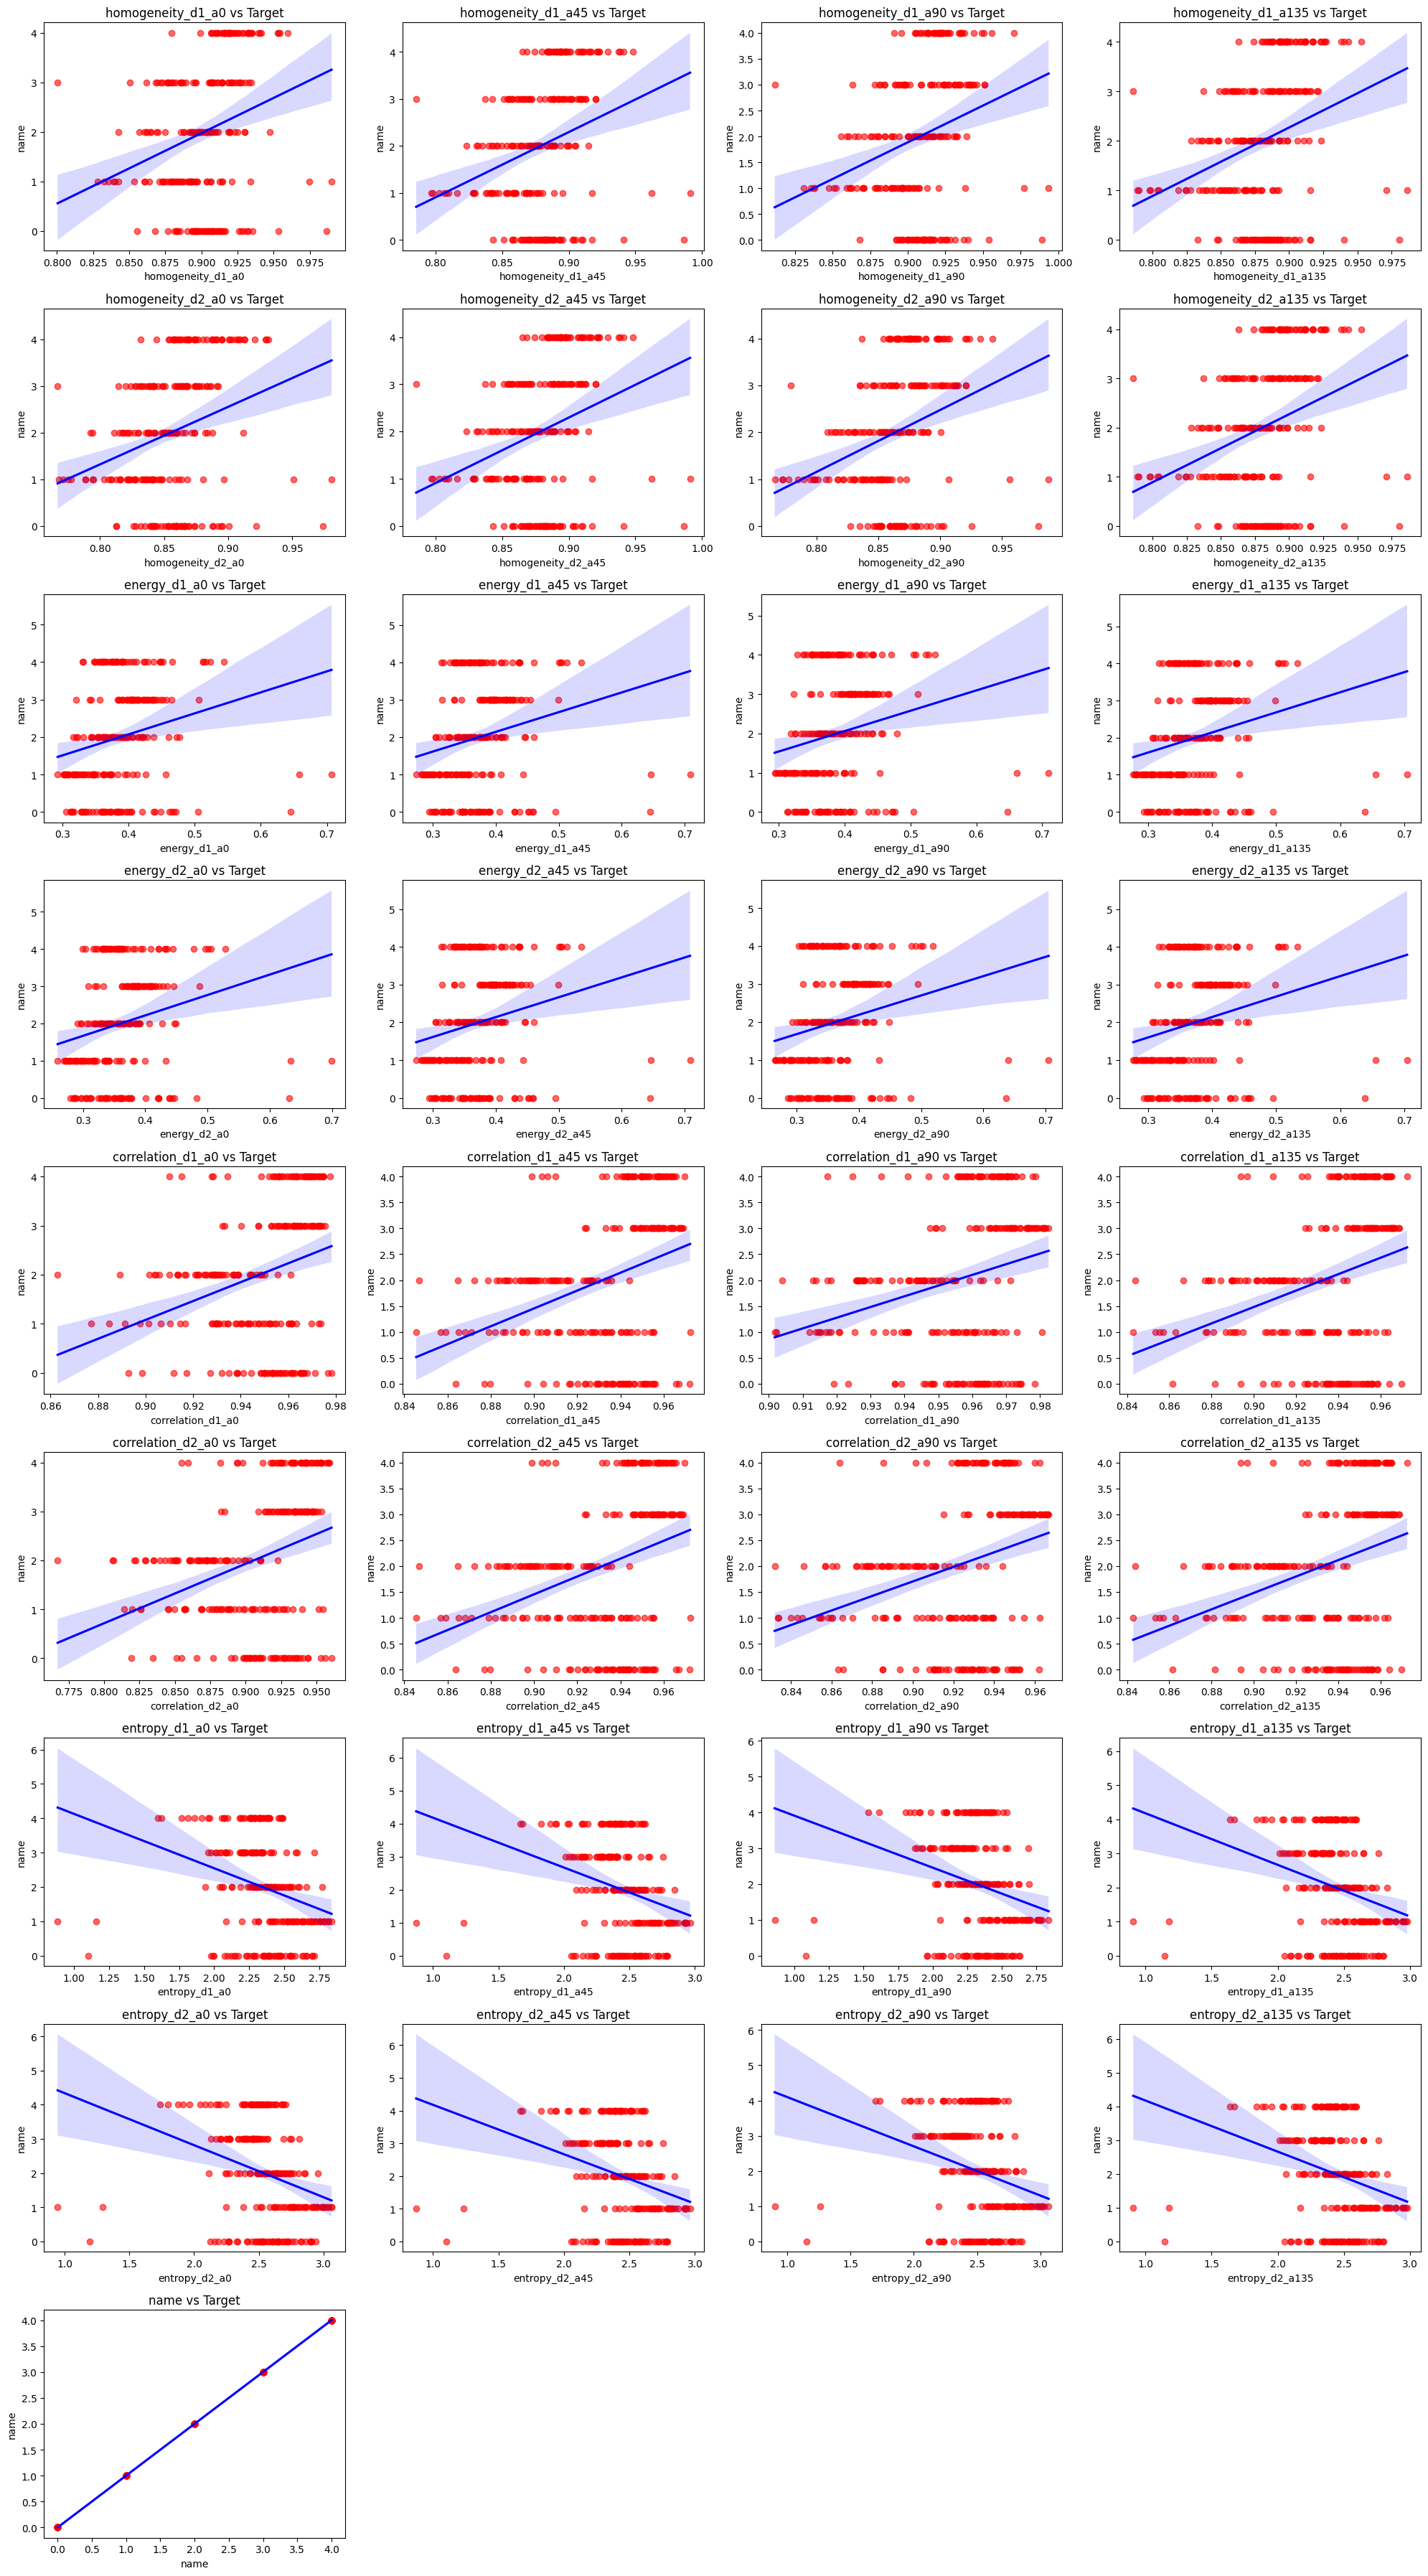

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan num_values sudah didefinisikan, misal:
# num_values = ['age', 'balance', 'duration', ...]

num_subplots = len(num_values)
num_cols = 4
num_rows = (num_subplots + num_cols - 1) // num_cols

plt.figure(figsize=(5 * num_cols, 4 * num_rows))  # Sesuaikan ukuran biar lebih proporsional

for i in range(num_subplots):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.regplot(
        data=df, 
        x=num_values[i], 
        y='name', 
        scatter_kws={'color': 'red', 'alpha': 0.6}, 
        line_kws={'color': 'blue'}
    )
    plt.title(f"{num_values[i]} vs Target")

plt.tight_layout()
plt.show()


###HeatMap Korelasi

<function matplotlib.pyplot.show(close=None, block=None)>

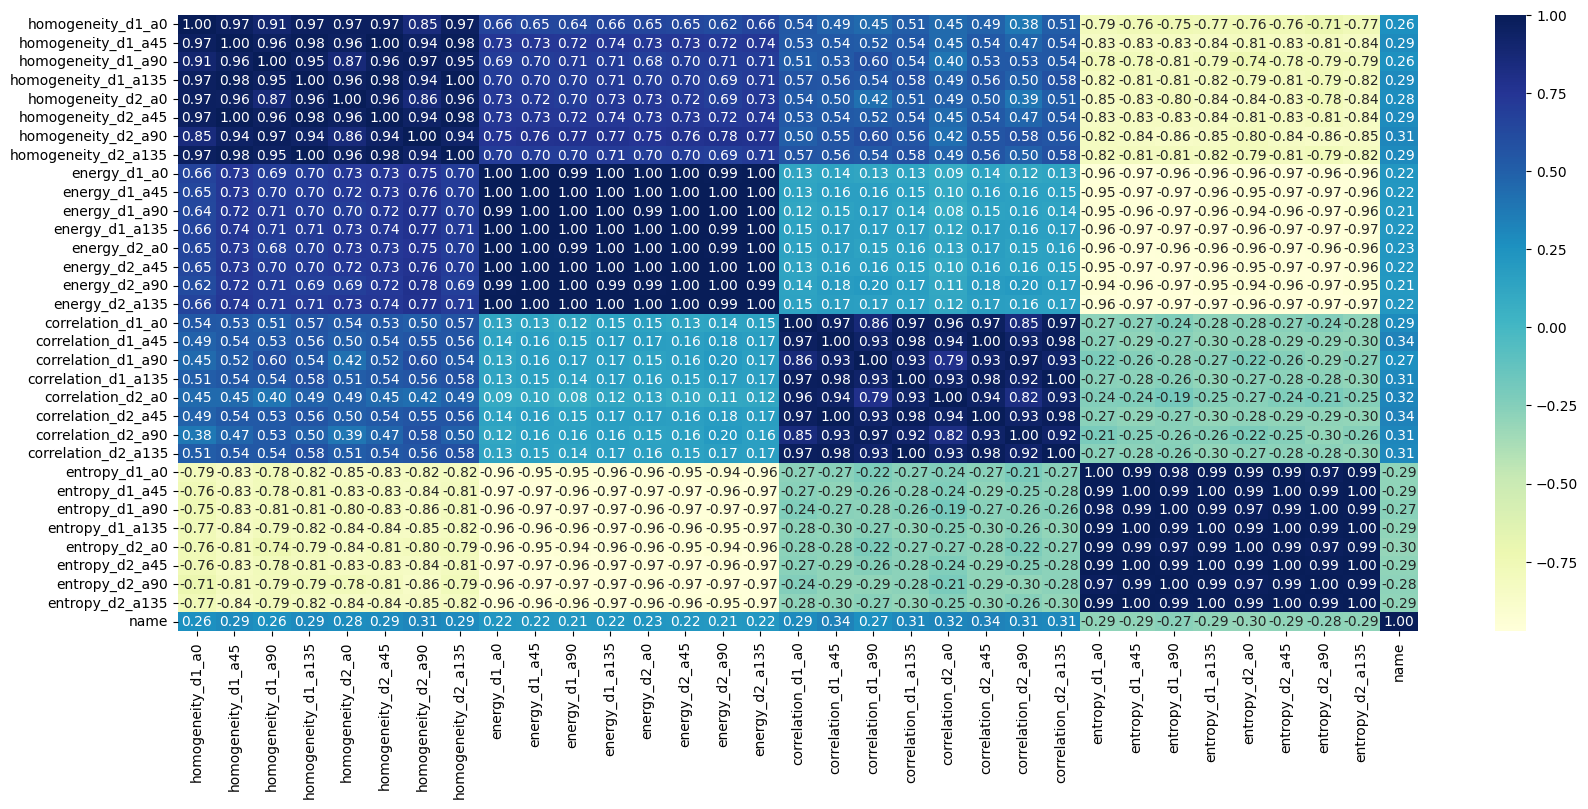

In [11]:
numeric_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(20,8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='YlGnBu')
plt.show

In [12]:
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Get the correlation of all features with the target variable (e.g., 'name')
target_correlation = correlation_matrix['name']

# Filter features with negative correlation
negative_correlation_features = target_correlation[target_correlation < 0]

# Print the features with negative correlation
print("Features with negative correlation with the target:")
print(negative_correlation_features)

Features with negative correlation with the target:
entropy_d1_a0     -0.291726
entropy_d1_a45    -0.293426
entropy_d1_a90    -0.268122
entropy_d1_a135   -0.293476
entropy_d2_a0     -0.304342
entropy_d2_a45    -0.293426
entropy_d2_a90    -0.281700
entropy_d2_a135   -0.293476
Name: name, dtype: float64


###Splitting Data

In [13]:
from sklearn.model_selection import train_test_split
columns_to_drop = ['filename', 'name'] + list(negative_correlation_features.index)

X = df.drop(columns=columns_to_drop)
y = df[['name']]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

###Standardize

In [15]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standarisasi hanya fitur numerik (bukan label yang sudah dienkode)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Tampilkan hasilnya
X_train_scaled_df

,homogeneity_d1_a0,homogeneity_d1_a45,homogeneity_d1_a90,homogeneity_d1_a135,homogeneity_d2_a0,homogeneity_d2_a45,homogeneity_d2_a90,homogeneity_d2_a135,energy_d1_a0,energy_d1_a45,...,energy_d2_a90,energy_d2_a135,correlation_d1_a0,correlation_d1_a45,correlation_d1_a90,correlation_d1_a135,correlation_d2_a0,correlation_d2_a45,correlation_d2_a90,correlation_d2_a135
0,0.104501,-0.007184,-0.017701,-0.252977,-0.015414,-0.007184,-0.272702,-0.252977,1.575799,1.493768,...,1.444391,1.421348,-2.134120,-2.410542,-2.273898,-2.377331,-2.591382,-2.410542,-2.835071,-2.377331
1,0.541917,0.505147,0.575745,0.439347,0.261548,0.505147,0.385932,0.439347,0.129481,0.123586,...,0.105943,0.102233,0.927118,0.904551,0.890551,0.880443,0.871353,0.904551,0.755148,0.880443
2,0.653054,0.664981,0.667359,0.518183,0.458628,0.664981,0.481035,0.518183,0.204269,0.207429,...,0.126218,0.156561,0.524141,0.724644,0.606309,0.285812,0.359839,0.724644,0.459437,0.285812
3,-1.372360,-1.444038,-1.666977,-1.265808,-1.120538,-1.444038,-1.478176,-1.265808,-0.744005,-0.757743,...,-0.761223,-0.729241,-1.243697,-1.310710,-1.504491,-1.121164,-1.004530,-1.310710,-1.384907,-1.121164
4,-0.019531,0.041728,0.048761,-0.235892,-0.337593,0.041728,-0.263267,-0.235892,-0.110621,-0.083273,...,-0.094268,-0.156213,-0.839187,-0.965983,-0.514344,-0.784567,-1.454677,-0.965983,-1.152234,-0.784567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.066865,0.749426,0.695373,0.881664,0.894351,0.749426,0.452974,0.881664,0.524517,0.354620,...,0.249319,0.418299,0.034168,-0.272694,-0.380187,-0.175398,-0.177073,-0.272694,-0.601628,-0.175398
196,-0.254293,0.095270,-0.032042,0.102013,0.173692,0.095270,0.201100,0.102013,-0.082903,0.029597,...,0.045970,0.031416,-0.441022,-0.288927,-0.520240,-0.253497,-0.017174,-0.288927,-0.305894,-0.253497
197,-0.833909,-0.817607,-0.572252,-0.389517,-0.996896,-0.817607,-0.405413,-0.389517,-0.634451,-0.543969,...,-0.380314,-0.486118,-0.460894,-0.364442,0.181456,0.074054,-0.681435,-0.364442,0.313422,0.074054
198,-0.826925,-0.583707,-0.537743,-0.710561,-0.472321,-0.583707,-0.238258,-0.710561,0.679396,0.718582,...,0.714256,0.691058,-0.015965,0.210291,0.342398,0.065796,0.093319,0.210291,0.530121,0.065796


In [17]:
# y_train = y_train.values.ravel()

In [18]:
# Create SVM classifier
# classifier = SVC(kernel='poly', random_state=42, C=10, gamma='scale')
classifier = SVC(kernel='linear', random_state=42, C=10)  
classifier.fit(X_train_scaled, y_train)

# Make predictions
# y_pred = classifier.predict(X_test)

d:\Project\Programming_Projects\Skripsi\Development\Modeling and Cloud Computing\env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, kernel='linear', random_state=42)

In [19]:
def eval_classification_SVM(model, x_tra, x_tes, y_tra, y_tes, label_encoder):
    # Prediksi pada data latih dan uji
    # y_pred_train = model.predict(x_tra)
    y_pred_test = model.predict(x_tes)

    # Ambil label asli
    target_labels = label_encoder.classes_

    # Evaluasi metrik klasifikasi
    print("Classification Report (Test Set):")
    print(classification_report(y_tes, y_pred_test, target_names=target_labels))

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_tes, y_pred_test))
    print("Precision (Test Set): %.2f" % precision_score(y_tes, y_pred_test, average='weighted'))
    print("Recall (Test Set): %.2f" % recall_score(y_tes, y_pred_test, average='weighted'))
    print("F1-Score (Test Set): %.2f" % f1_score(y_tes, y_pred_test, average='weighted'))

    # Confusion matrix
    cm = confusion_matrix(y_tes, y_pred_test)
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_labels)
    disp.plot()
    plt.show()


Classification Report (Test Set):
              precision    recall  f1-score   support

      Albert       0.70      0.54      0.61        13
       Alvin       0.57      0.57      0.57         7
      Ritter       0.80      0.80      0.80        10
      Tamara       1.00      1.00      1.00        11
    Vincent        0.67      0.89      0.76         9

    accuracy                           0.76        50
   macro avg       0.75      0.76      0.75        50
weighted avg       0.76      0.76      0.76        50

Accuracy (Test Set): 0.76
Precision (Test Set): 0.76
Recall (Test Set): 0.76
F1-Score (Test Set): 0.76
Confusion Matrix:
 [[ 7  1  1  0  4]
 [ 3  4  0  0  0]
 [ 0  2  8  0  0]
 [ 0  0  0 11  0]
 [ 0  0  1  0  8]]


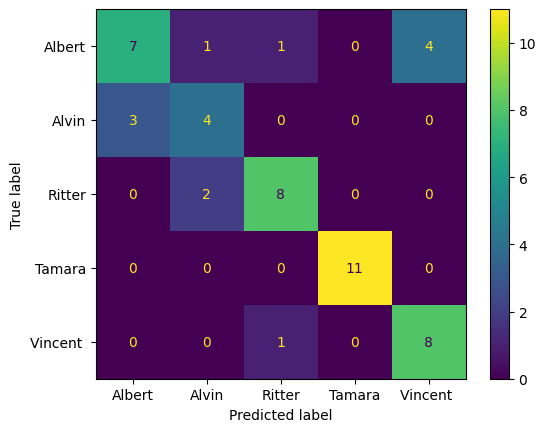

In [20]:
# eval_classification_SVM(classifier, X_train, X_test, y_train, y_test, le)

eval_classification_SVM(classifier, X_train, X_test_scaled, y_train, y_test, le)

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Tentukan model dasar
svc = SVC()

# Tentukan kombinasi hyperparameter yang mau diuji
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # hanya dipakai di RBF, poly, sigmoid
}

# Setup grid search dengan cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
                           cv=10, scoring='accuracy', verbose=1)

# Fit ke data
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 10 folds for each of 45 candidates, totalling 450 fits


d:\Project\Programming_Projects\Skripsi\Development\Modeling and Cloud Computing\env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Project\Programming_Projects\Skripsi\Development\Modeling and Cloud Computing\env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Project\Programming_Projects\Skripsi\Development\Modeling and Cloud Computing\env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Project\Programming

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best score: 0.77


d:\Project\Programming_Projects\Skripsi\Development\Modeling and Cloud Computing\env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# Inisialisasi K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Jalankan cross_validate dengan scorer kustom
cv_results = cross_validate(classifier, X_train_scaled, y_train.values.ravel(), cv=kf, scoring=scoring)

# Cetak hasil
print("Accuracy:", cv_results['test_accuracy'])
print("Mean Accuracy:", cv_results['test_accuracy'].mean())

print("Precision:", cv_results['test_precision'])
print("Mean Precision:", cv_results['test_precision'].mean())

print("Recall:", cv_results['test_recall'])
print("Mean Recall:", cv_results['test_recall'].mean())

print("F1 Score:", cv_results['test_f1'])
print("Mean F1 Score:", cv_results['test_f1'].mean())

Accuracy: [0.85 0.75 0.9  0.6  0.8  0.8  0.8  0.85 0.7  0.75]
Mean Accuracy: 0.78
Precision: [0.88333333 0.80333333 0.9        0.51428571 0.83       0.85285714
 0.80333333 0.9        0.66666667 0.74333333]
Mean Precision: 0.7897142857142857
Recall: [0.87619048 0.75333333 0.91       0.54       0.85285714 0.8
 0.84333333 0.8547619  0.66       0.76      ]
Mean Recall: 0.7850476190476191
F1 Score: [0.85809524 0.75809524 0.88253968 0.52222222 0.82666667 0.77444444
 0.80831169 0.84937729 0.65878788 0.74571429]
Mean F1 Score: 0.7684254634254634


In [52]:
refs_cols = list(X.columns)
target = list(y.columns)
model = classifier
label_encoder = le
StandardScaler = scaler

In [53]:
jb.dump(value=[classifier, refs_cols, target], filename="GLCM_SVM_Face_Classification_Model.pkl")

['GLCM_SVM_Face_Classification_Model.pkl']

In [54]:
jb.dump(label_encoder, "model_label_encoder.pkl")

['model_label_encoder.pkl']

In [55]:
jb.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [56]:
dataframe = pd.read_csv("glcm_features_testing_new_may.csv")
dataframe

,filename,homogeneity_d1_a0,homogeneity_d1_a45,homogeneity_d1_a90,homogeneity_d1_a135,homogeneity_d2_a0,homogeneity_d2_a45,homogeneity_d2_a90,homogeneity_d2_a135,energy_d1_a0,...,correlation_d2_a135,entropy_d1_a0,entropy_d1_a45,entropy_d1_a90,entropy_d1_a135,entropy_d2_a0,entropy_d2_a45,entropy_d2_a90,entropy_d2_a135,name
0,Albert (10).jpg,0.923006,0.891026,0.915328,0.901792,0.881593,0.891026,0.861709,0.901792,0.408773,...,0.944628,2.229443,2.379441,2.256614,2.319527,2.426563,2.379441,2.484109,2.319527,Albert
1,Albert (4).jpg,0.881292,0.857922,0.899121,0.862416,0.825254,0.857922,0.851740,0.862416,0.315967,...,0.936607,2.680344,2.777150,2.590383,2.752503,2.918762,2.777150,2.787854,2.752503,Albert
2,alvin (1).jpg,0.897318,0.873166,0.904025,0.872466,0.841546,0.873166,0.857020,0.872466,0.361059,...,0.939927,2.519613,2.611844,2.468381,2.619139,2.754623,2.611844,2.655967,2.619139,Alvin
3,alvin (2).jpg,0.891846,0.868599,0.900583,0.867432,0.832588,0.868599,0.853522,0.867432,0.370092,...,0.926575,2.468134,2.563115,2.420066,2.571620,2.708057,2.563115,2.621192,2.571620,Alvin
4,alvin (3).jpg,0.896748,0.870498,0.903993,0.880026,0.846904,0.870498,0.856878,0.880026,0.324656,...,0.952972,2.556373,2.670930,2.516345,2.631664,2.774299,2.670930,2.723471,2.631664,Alvin
5,Ritter (15).jpg,0.875050,0.846162,0.880413,0.843109,0.811219,0.846162,0.815756,0.843109,0.343513,...,0.897146,2.597773,2.712559,2.556848,2.711579,2.850969,2.712559,2.808426,2.711579,Ritter
6,Ritter (6).jpg,0.910331,0.893575,0.932770,0.895493,0.853065,0.893575,0.890036,0.895493,0.419557,...,0.913662,2.239495,2.311406,2.103232,2.294889,2.492244,2.311406,2.296134,2.294889,Ritter
7,Tamara (22).jpg,0.924672,0.910207,0.945886,0.911495,0.880028,0.910207,0.913367,0.911495,0.437281,...,0.957570,2.086052,2.143398,1.979571,2.142686,2.275685,2.143398,2.133111,2.142686,Tamara
8,Tamara (3).jpg,0.907853,0.894136,0.931175,0.893907,0.863173,0.894136,0.900397,0.893907,0.415387,...,0.962863,2.208866,2.276028,2.124352,2.273372,2.392361,2.276028,2.266837,2.273372,Tamara
9,Vincent (18).jpg,0.914328,0.886136,0.916976,0.887219,0.857745,0.886136,0.865811,0.887219,0.367668,...,0.950465,2.383165,2.507125,2.381786,2.508963,2.611498,2.507125,2.609271,2.508963,Vincent


In [57]:
dataframe.drop(columns=[col for col in dataframe.columns if (dataframe[col] == 0).all()])

,filename,homogeneity_d1_a0,homogeneity_d1_a45,homogeneity_d1_a90,homogeneity_d1_a135,homogeneity_d2_a0,homogeneity_d2_a45,homogeneity_d2_a90,homogeneity_d2_a135,energy_d1_a0,...,correlation_d2_a135,entropy_d1_a0,entropy_d1_a45,entropy_d1_a90,entropy_d1_a135,entropy_d2_a0,entropy_d2_a45,entropy_d2_a90,entropy_d2_a135,name
0,Albert (10).jpg,0.923006,0.891026,0.915328,0.901792,0.881593,0.891026,0.861709,0.901792,0.408773,...,0.944628,2.229443,2.379441,2.256614,2.319527,2.426563,2.379441,2.484109,2.319527,Albert
1,Albert (4).jpg,0.881292,0.857922,0.899121,0.862416,0.825254,0.857922,0.851740,0.862416,0.315967,...,0.936607,2.680344,2.777150,2.590383,2.752503,2.918762,2.777150,2.787854,2.752503,Albert
2,alvin (1).jpg,0.897318,0.873166,0.904025,0.872466,0.841546,0.873166,0.857020,0.872466,0.361059,...,0.939927,2.519613,2.611844,2.468381,2.619139,2.754623,2.611844,2.655967,2.619139,Alvin
3,alvin (2).jpg,0.891846,0.868599,0.900583,0.867432,0.832588,0.868599,0.853522,0.867432,0.370092,...,0.926575,2.468134,2.563115,2.420066,2.571620,2.708057,2.563115,2.621192,2.571620,Alvin
4,alvin (3).jpg,0.896748,0.870498,0.903993,0.880026,0.846904,0.870498,0.856878,0.880026,0.324656,...,0.952972,2.556373,2.670930,2.516345,2.631664,2.774299,2.670930,2.723471,2.631664,Alvin
5,Ritter (15).jpg,0.875050,0.846162,0.880413,0.843109,0.811219,0.846162,0.815756,0.843109,0.343513,...,0.897146,2.597773,2.712559,2.556848,2.711579,2.850969,2.712559,2.808426,2.711579,Ritter
6,Ritter (6).jpg,0.910331,0.893575,0.932770,0.895493,0.853065,0.893575,0.890036,0.895493,0.419557,...,0.913662,2.239495,2.311406,2.103232,2.294889,2.492244,2.311406,2.296134,2.294889,Ritter
7,Tamara (22).jpg,0.924672,0.910207,0.945886,0.911495,0.880028,0.910207,0.913367,0.911495,0.437281,...,0.957570,2.086052,2.143398,1.979571,2.142686,2.275685,2.143398,2.133111,2.142686,Tamara
8,Tamara (3).jpg,0.907853,0.894136,0.931175,0.893907,0.863173,0.894136,0.900397,0.893907,0.415387,...,0.962863,2.208866,2.276028,2.124352,2.273372,2.392361,2.276028,2.266837,2.273372,Tamara
9,Vincent (18).jpg,0.914328,0.886136,0.916976,0.887219,0.857745,0.886136,0.865811,0.887219,0.367668,...,0.950465,2.383165,2.507125,2.381786,2.508963,2.611498,2.507125,2.609271,2.508963,Vincent


In [58]:
dataframe = dataframe[X.columns]

In [59]:
new_data_scaled = scaler.transform(dataframe)

In [60]:
predictions = classifier.predict(new_data_scaled)

In [61]:
# Mengubah prediksi kembali ke label aslinya
predicted_labels = label_encoder.inverse_transform(predictions)

# Menampilkan prediksi
print("Prediksi pada data baru:")
print(predicted_labels)

Prediksi pada data baru:
['Albert' 'Albert' 'Alvin' 'Alvin' 'Albert' 'Ritter' 'Ritter' 'Tamara'
 'Tamara' 'Vincent ' 'Vincent ']
